<div dir="rtl">

# جلسه هفتم، پنج شهریور
در جلسه گذشته با مفاهیم اولیه برنامه نویسی شی گرا آشنا شدیم، در این جلسه قصد داریم تا کمی بیشتر به کتابخانه های کاربری پایتون بپردازیم و دانش خود را کامل تر کنیم.
</div>

In [1]:
# meaning of comma separated arguments:
x, y = 0, 1

# this is the same as:
# x = 0
# y = 1
print(x, y)

0 1


In [2]:
# in general, we can unpack any tuple of values
numbers = [1, 2, 3]
# but first we have to convert to a tuple
numbers = tuple(numbers)
x, y, z = numbers
print(x, 2*y)

1 4


In [3]:
# some functions also return more than one output
def func(n):
    return n, 2*n, 3*n

print(func(2))

(2, 4, 6)


In [4]:
# we can unpack the returned values too
def func(n):
    return n, 2*n, 3*n

x, y, z = func(2)
print(z)

6


# Sympy

We have explored two packages so far; Numpy and Matplotlib. In this section, we will explore two more key packages for python: Sympy and csv

Sympy stands for Symbolic Python, its main purpose is symbolic computation (this is by itself a major area of computer science and applied mathematics). Sympy basically helps us do regular math using the computer!

In [5]:
from math import sqrt
# perfect square
print(sqrt(4))
# not a perfect square
print(sqrt(8))

2.0
2.8284271247461903


We should have a tool that lets us figure out that
$$\sqrt{8} = 2\sqrt{2}$$

In [6]:
# sympy allows us to do this, first we need to install it
# by running pip install sympy
# then we can write
import sympy
sympy.sqrt(3)

sqrt(3)

In [7]:
sympy.sqrt(8)

2*sqrt(2)

In [8]:
from sympy import symbols
# the symbols function defines symbolic variables
x, y = symbols('x y')
expr = x + 2*y
expr

x + 2*y

In [11]:
# we can do most normal operations on an expression
expr + 1

4

In [10]:
# x is not a normal python variabld! its a symbolic variable now
expr - x

2*y

In [12]:
# sympy will keep things simplified unless we tell it not to using the expand function
x*expr

x*(x + 2*y)

In [13]:
# we can subsitute values to calculate expressions
# substitute the symbolic value x with 1
# remember that expr = x + 2y
expr.subs(x, 2)

2*y + 2

In [15]:
# you can do more than one substitution using a list of tuples
substitutions = [(x, 1), (y, 2)]
expr.subs(substitutions)

sympy.core.numbers.Integer

In [16]:
# the expand function allows us to get a single computed expression
from sympy import expand
expanded_expr = expand(x*expr)
expanded_expr

x**2 + 2*x*y

In [17]:
# factor reverses the process
from sympy import factor
factor(expanded_expr)

x*(x + 2*y)

In [20]:
# we can differenciate stuff
from sympy import *
x, t, z, nu = symbols('x t z nu')
# differenciate expression sin(x)*exp(x) with respect to x
diff_of_expression = diff(sin(x)*exp(x), x) # df/dx, f = sin(x)*exp(x)
diff_of_expression

exp(x)*sin(x) + exp(x)*cos(x)

In [21]:
# lets compute the integral of this expression to see what we get
integrate(diff_of_expression, x)

exp(x)*sin(x)

In [23]:
# we can also calculate limits
# sin(x)/x x -> 0
limit(z*sin(x)/x, x, 0)

z

In [24]:
# and solve equations
# this code solves x^2 - 2 = 0
ans = solve(x**2 - 2, x)
# returns a list
type(ans)

list

In [26]:
ans

-1.41421356237310

In [27]:
# sympy can evaluate numerical expressions by the evalf method
pi.evalf()

3.14159265358979

In [31]:
# with arbitrary precision!
pi.evalf(50)

3.1415926535897932384626433832795028841971693993751

In [30]:
# we can use sympy to simplify expressions
# indeed, cos^2 + sin^2 = 1
simplify(sin(x)**2 + cos(x)**2)

1

In [32]:
simplify((x**3 + x**2 - x - 1)/(x**2 + 2*x + 1))

x - 1

In [33]:
simplify(gamma(x)/gamma(x - 2))

(x - 2)*(x - 1)

In [34]:
# calculating binomial coefficients
binomial(5, 2)
# = 5!/3!2! = 120/(6*2) = 10

10

In [37]:
# we used Symbols to create symbolic values
# we can now use Functions to create Functional values

y = Function('y')
# solve the differential equation y′′−y=e^t
eq = Eq(y(t).diff(t, t) - y(t), exp(t))
solved = dsolve(eq, y(t))
solved

Eq(y(t), C2*exp(-t) + (C1 + t/2)*exp(t))

In [38]:
# we can substitute t = 1 to get a new expression
solved.subs(t, 1)

Eq(y(1), C2*exp(-1) + E*(C1 + 1/2))

In [39]:
# lets see a complete list of variables in our function
solved.free_symbols

{C1, C2, t}

In [40]:
# now lets create a specific function
C1, C2 = symbols("C1, C2")
f = solved.subs([(C1, 2), (C2, 1)])
f

Eq(y(t), (t/2 + 2)*exp(t) + exp(-t))

In [41]:
f.subs(t, 5)

Eq(y(5), exp(-5) + 9*exp(5)/2)

In [43]:
f.subs(t, 5).evalf(40)

Eq(y(5), 667.8659539085938008621167462309084067299)

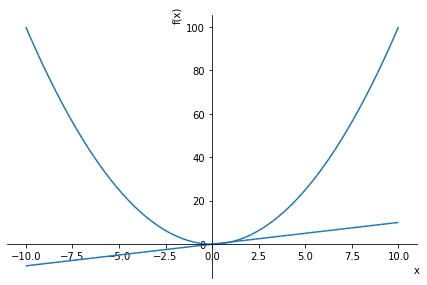

In [44]:
# plotting with sympy
from sympy import symbols
from sympy.plotting import plot
# first make a free variable x
x = symbols('x')
# make two plots
p1 = plot(x*x, show=False)
p2 = plot(x, show=False)
# combine the two plots into one
p1.append(p2[0])
# show plot
p1.show()

## Simple example from physics
From Newton's second law we have
$$F = ma$$
Where $m$ is mass, $a$ is acceleration and
$$a = \frac{d^2x}{dt^2}$$
if $x$ denotes the position of the mass. Now, we know that if we have a spring and we attach a mass to it, then at position $x$ the force on the mass from the spring is $-kx$ (Hooke's law). So, for a simple spring and mass system we have
$$F=ma \Rightarrow -kx = m\frac{d^2x}{dt^2}$$
Lets solve this for a spring with $k = 10$ and a mass of $m=1$ kilograms, we want to solve
$$-10x = \frac{d^2x}{dt^2}$$

In [45]:
# lets first create our free variables
t = symbols('t')
x = Function('x')(t)
# lets write the equation out
eq = Eq(x.diff(t, t), -10*x)
eq

Eq(Derivative(x(t), (t, 2)), -10*x(t))

In [46]:
# now lets solve this
solved = dsolve(eq, x)
solved

Eq(x(t), C1*sin(sqrt(10)*t) + C2*cos(sqrt(10)*t))

In [47]:
# for simplicity we can set C1 = C2 = 1
C1, C2 = symbols("C1, C2")
solved = solved.subs([(C1, 1), (C2, 1)])
solved

Eq(x(t), sin(sqrt(10)*t) + cos(sqrt(10)*t))

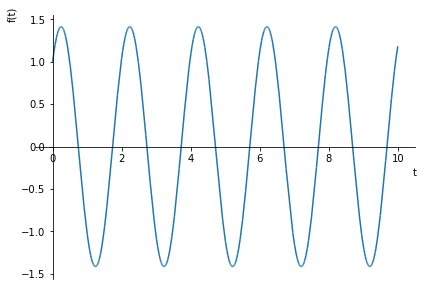

In [48]:
# lets get the right hand side of this equality and plot it
p1 = plot(solved.rhs, (t, 0, 10), show=False)
p1.show()


## csv
csv stands for comma separated variable. This is a built-in python package used for data manipulation and communication with files. csv is used to get data from external programs or processes such as other software or sensors in the field.

In [49]:
import csv

In [50]:
# with is a keyword that is used for error handling, read more about it if
# you want, we won't talk about it here
with open('WHO_dataset_1.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            pass

csv_file.close()

Column names are ï»¿Name, WHO Region, Cases - cumulative total, Cases - cumulative total per 100000 population, Cases - newly reported in last 7 days, Cases - newly reported in last 7 days per 100000 population, Cases - newly reported in last 24 hours, Deaths - cumulative total, Deaths - cumulative total per 100000 population, Deaths - newly reported in last 7 days, Deaths - newly reported in last 7 days per 100000 population, Deaths - newly reported in last 24 hours


In [51]:
# opening a csv file as a dict
with open('WHO_dataset_1.csv', mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    line_count = 0
    for row in csv_reader:
        # nevermind this, its just to fix the data
        if None in row:
            row.pop(None)
        if line_count == 0:
            print("statistics for the world as of today are:")
            for i in row:
                print(i + ":", row[i])
        for i in row:
            print(i + ":", row[i])
csv_file.close()

statistics for the world as of today are:
ï»¿Name: Global
WHO Region: 
Cases - cumulative total: 213752662
Cases - cumulative total per 100000 population: 2742.3382541497726
Cases - newly reported in last 7 days: 4519052
Cases - newly reported in last 7 days per 100000 population: 57.97714543593398
Cases - newly reported in last 24 hours: 655952
Deaths - cumulative total: 4459381
Deaths - cumulative total per 100000 population: 57.21159676658748
Deaths - newly reported in last 7 days: 67293
Deaths - newly reported in last 7 days per 100000 population: 0.8633350640400483
Deaths - newly reported in last 24 hours: 9142
ï»¿Name: Global
WHO Region: 
Cases - cumulative total: 213752662
Cases - cumulative total per 100000 population: 2742.3382541497726
Cases - newly reported in last 7 days: 4519052
Cases - newly reported in last 7 days per 100000 population: 57.97714543593398
Cases - newly reported in last 24 hours: 655952
Deaths - cumulative total: 4459381
Deaths - cumulative total per 10000

In [52]:
# lets get the statistics of iran
with open('WHO_dataset_1.csv', mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    line_count = 0
    for row in csv_reader:
        if row["ï»¿Name"] == 'Iran (Islamic Republic of)':
            print("statistics for Iran as of today are:")
            for i in row:
                print(i + ":", row[i])
            break
csv_file.close()

statistics for Iran as of today are:
ï»¿Name: Iran (Islamic Republic of)
WHO Region: Eastern Mediterranean
Cases - cumulative total: 4796377
Cases - cumulative total per 100000 population: 5710.45
Cases - newly reported in last 7 days: 239960
Cases - newly reported in last 7 days per 100000 population: 285.69
Cases - newly reported in last 24 hours: 39983
Deaths - cumulative total: 104022
Deaths - cumulative total per 100000 population: 123.85
Deaths - newly reported in last 7 days: 4331
Deaths - newly reported in last 7 days per 100000 population: 5.16
Deaths - newly reported in last 24 hours: 665


In [53]:
# lets get cases per 100,000 population so that we can plot it against
# deaths per 100,000 population
cases = []
deaths = []
countries = []
with open('WHO_dataset_1.csv', mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    line_count = 0
    for row in csv_reader:
        if row["Cases - cumulative total per 100000 population"] == "" or row["Deaths - cumulative total per 100000 population"] == "":
            continue
        cases.append(float(row["Cases - cumulative total per 100000 population"]))
        deaths.append(float(row["Deaths - cumulative total per 100000 population"]))
        countries.append(row["ï»¿Name"])
csv_file.close()

In [54]:
cases

[2742.3382541497726,
 11471.02,
 2359.31,
 9698.4,
 4676.44,
 9708.56,
 9984.41,
 7438.64,
 11390.63,
 9619.54,
 10173.12,
 5710.45,
 7549.1,
 1472.21,
 4691.54,
 2520.6,
 7607.02,
 4589.89,
 5209.18,
 6501.58,
 11066.58,
 1718.44,
 4593.69,
 15694.23,
 8553.86,
 4993.65,
 900.26,
 3911.14,
 1077.52,
 10181.07,
 514.21,
 1605.83,
 10850.82,
 5659.54,
 9963.85,
 11831.73,
 4419.97,
 2246.34,
 8306.62,
 7765.05,
 8802.6,
 2583.89,
 10808.79,
 7203.05,
 7591.69,
 5478.5,
 5395.81,
 8725.03,
 5318.59,
 1559.8,
 13340.38,
 2829.42,
 4178.19,
 5004.08,
 6420.87,
 10509.63,
 8788.02,
 6425.94,
 2483.45,
 9572.42,
 1904.28,
 3963.12,
 7227.1,
 11062.66,
 391.79,
 700.02,
 9157.41,
 7059.24,
 3213.21,
 6895.62,
 5848.89,
 3345.64,
 1151.54,
 5907.68,
 4372.61,
 261.03,
 10597.22,
 280.39,
 15981.25,
 6589.48,
 12627.27,
 474.59,
 8090.45,
 431.55,
 8037.3,
 6433.13,
 1115.68,
 6078.6,
 440.52,
 91.63,
 2679.46,
 8235.46,
 5798.93,
 392.57,
 455.23,
 2833.92,
 6414.37,
 460.82,
 7427.16,
 4912.2

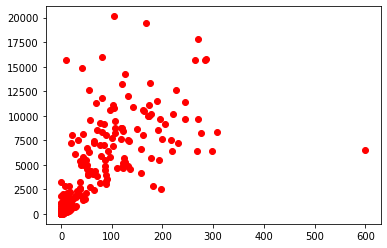

In [55]:
# now lets plot the data
import matplotlib.pyplot as plt
plt.plot(deaths, cases, 'ro')
plt.show()

C:\Users\98937\AppData\Local\Temp/ipykernel_16484/2857902635.py:3: RuntimeWarning: divide by zero encountered in log
  log_cases = [np.log(i) for i in cases]


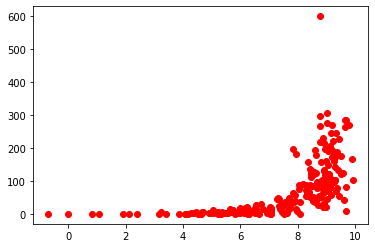

In [56]:
# lets compare log(cases) to deaths
import numpy as np
log_cases = [np.log(i) for i in cases]
plt.plot(log_cases, deaths, 'ro')
plt.show()

In [57]:
# turn the data into a dictionary
data = {}
for i in range(0, len(countries)):
    data[countries[i]] = [cases[i], deaths[i]]

print(data)

{'Global': [2742.3382541497726, 57.21159676658748], 'United States of America': [11471.02, 189.17], 'India': [2359.31, 31.62], 'Brazil': [9698.4, 270.86], 'Russian Federation': [4676.44, 122.82], 'The United Kingdom': [9708.56, 194.45], 'France': [9984.41, 172.86], 'Turkey': [7438.64, 65.46], 'Argentina': [11390.63, 245.17], 'Colombia': [9619.54, 244.46], 'Spain': [10173.12, 176.81], 'Iran (Islamic Republic of)': [5710.45, 123.85], 'Italy': [7549.1, 216.15], 'Indonesia': [1472.21, 47.27], 'Germany': [4691.54, 110.72], 'Mexico': [2520.6, 197.36], 'Poland': [7607.02, 198.46], 'South Africa': [4589.89, 135.68], 'Ukraine': [5209.18, 122.48], 'Peru': [6501.58, 600.34], 'Netherlands': [11066.58, 103.25], 'Philippines': [1718.44, 29.65], 'Iraq': [4593.69, 50.74], 'Czechia': [15694.23, 284.21], 'Chile': [8553.86, 192.08], 'Malaysia': [4993.65, 45.78], 'Bangladesh': [900.26, 15.62], 'Canada': [3911.14, 71.14], 'Japan': [1077.52, 12.44], 'Belgium': [10181.07, 219.99], 'Pakistan': [514.21, 11.42]

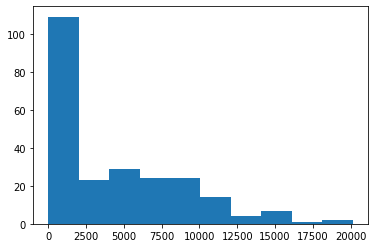

In [58]:
plt.hist(cases)
plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

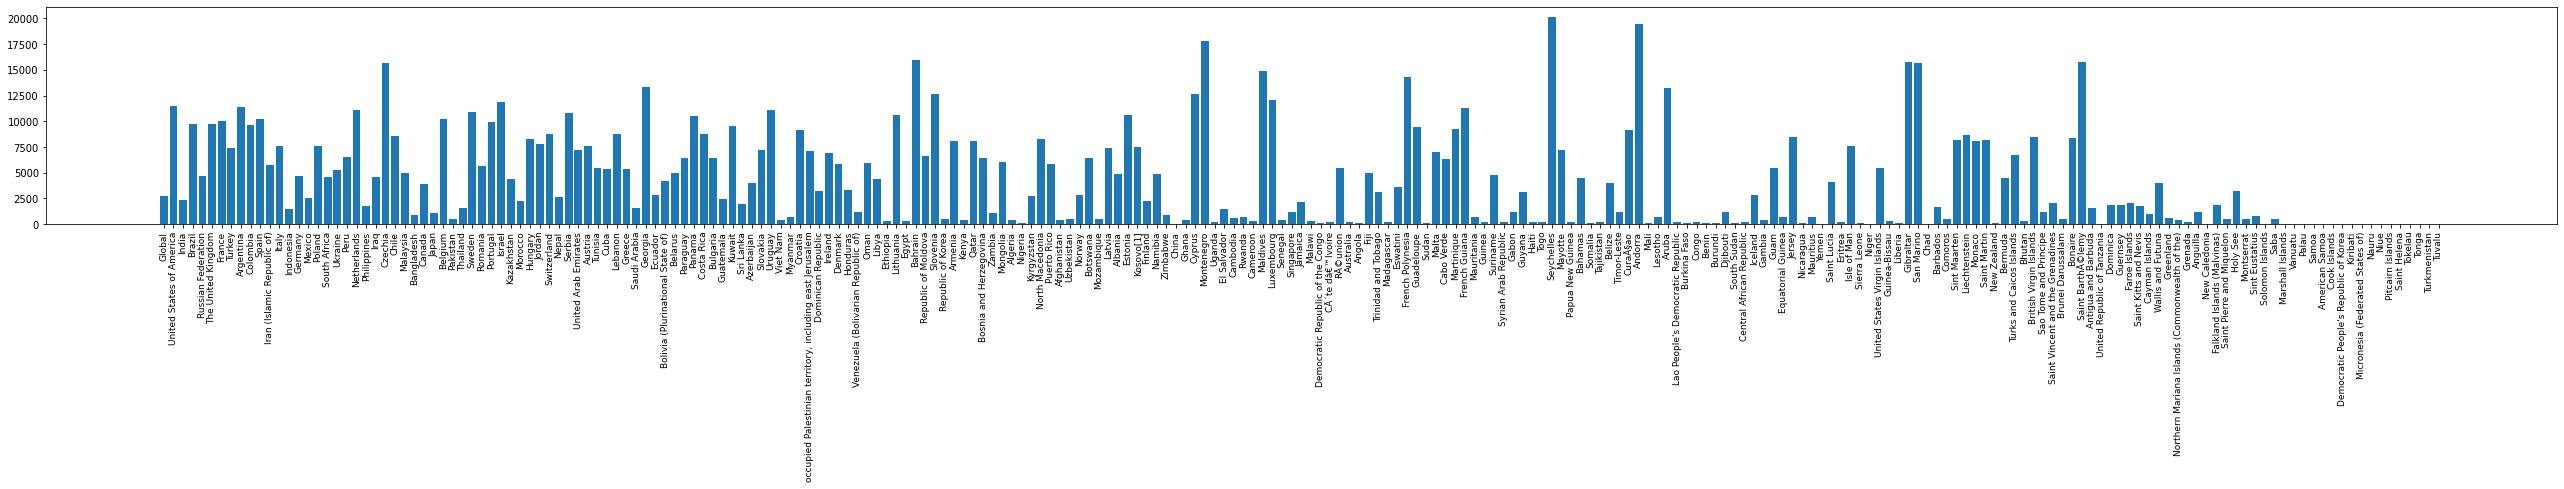

In [59]:
# the rotation parameter rotates our labels
plt.figure(figsize=(45,4))
plt.bar(countries, cases)
plt.xticks(rotation='vertical', fontsize=9)

237 237


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

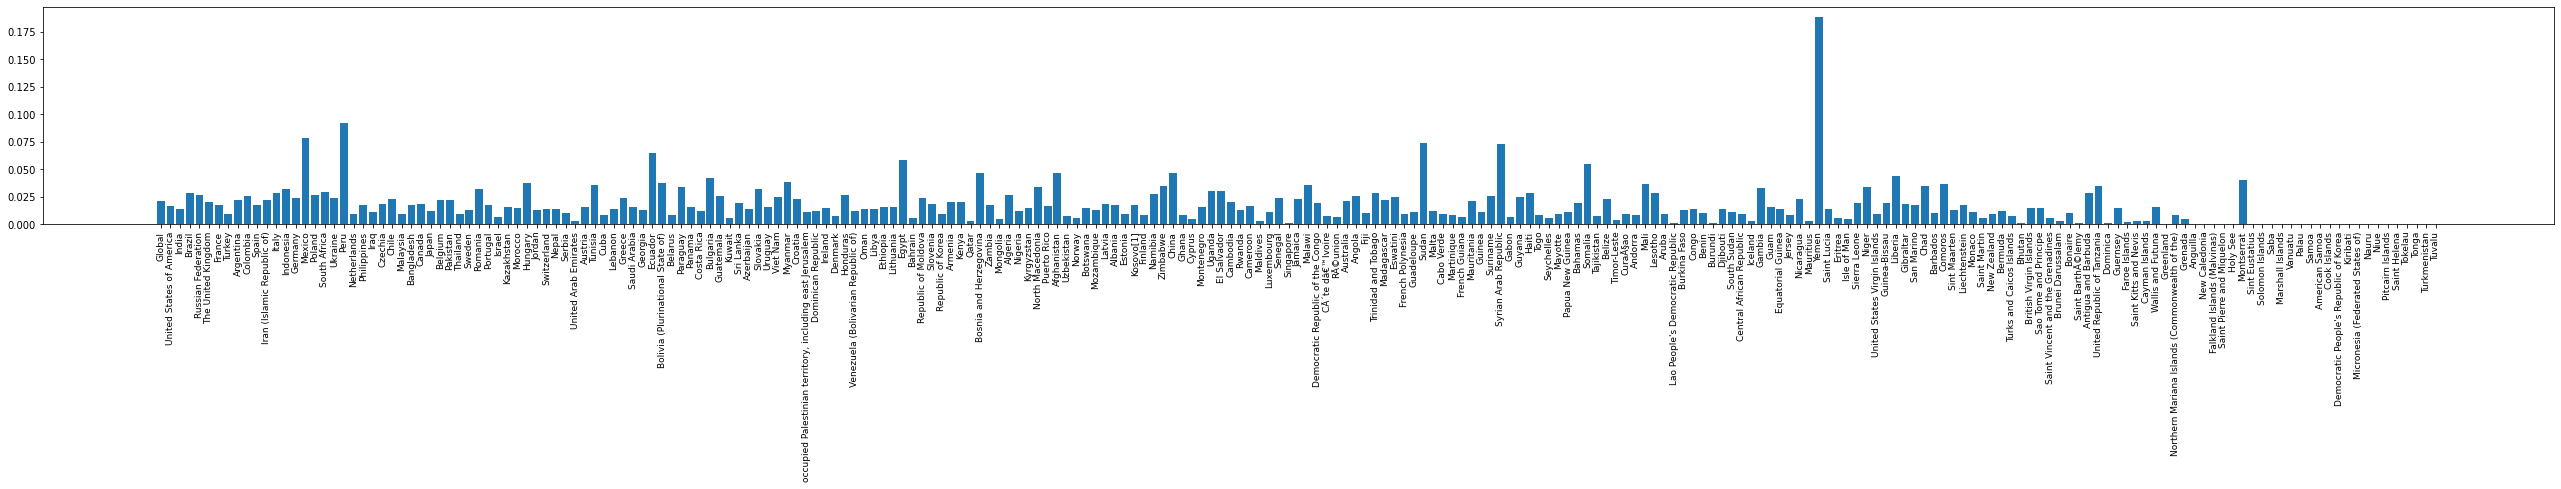

In [60]:
# the rotation parameter rotates our labels
plt.figure(figsize=(45,4))

ratio_list = []
for i in range(0, len(cases)):
    if cases[i] != 0:
        ratio_list.append(deaths[i]/cases[i])
    else:
        ratio_list.append(0)
        
print(len(countries), len(ratio_list))
plt.bar(countries, ratio_list)
plt.xticks(rotation='vertical', fontsize=9)

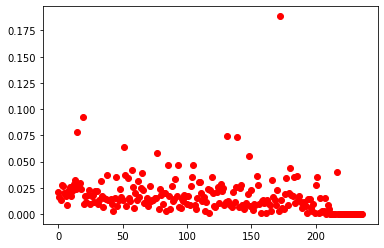

In [61]:
plt.plot(ratio_list, 'ro')

### Exercise:
Write a program that _builds a coordinate system_, it should store points as objects, have a method to print the information of the vector (using str), have a method to calculate the length of a vector by the formula
$len = \sqrt{x^2 + y^2}$, it should also have a way of determining which vector is bigger than another using the `<` operator. If a vector has a bigger size than another one, the `<` operator should return True. 

### Exercise:
solve the following differential equation (this equation models a damped oscillator):
$$2\frac{d^2x}{dt^2} + \frac{dx}{dt} + x = 0$$
and plot the resulting graph.

In [62]:
# lets get cases per 100,000 population so that we can plot it against
# deaths per 100,000 population
cases = []
deaths = []
date = []
ratio = []
with open('owid-covid-data.csv', mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    line_count = 0
    for row in csv_reader:
        if row["iso_code"] == "IRN":
            cases.append(float(row["new_cases"]))
            deaths.append(float(row["new_deaths"]))
            date.append(row["date"])

for i in range(0, len(cases)):
    if cases[i] != 0:
        ratio.append(deaths[i]/cases[i])
    else:
        ratio.append(0)

log_cases = [np.log(i) for i in cases]
csv_file.close()

In [63]:
print(date.index("2021-02-09"))
print(date.index("2021-06-08"))
print(date.index("2021-07-18"))

356
475
515


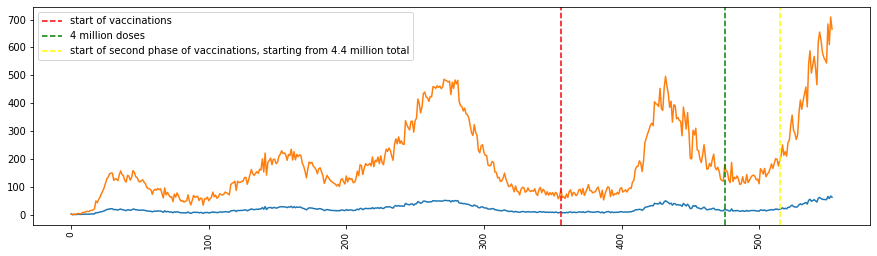

In [64]:
plt.figure(figsize=(15,4))
plt.xticks(rotation='vertical', fontsize=9)
plt.plot(np.array(deaths)/np.array(log_cases))
plt.plot(deaths)
plt.axvline(356, linestyle="--", color="red", label="start of vaccinations")
plt.axvline(475, linestyle="--", color="green", label="4 million doses")
plt.axvline(515, linestyle="--", color="yellow", label="start of second phase of vaccinations, starting from 4.4 million total")
plt.legend()
plt.show()